<div style="padding:15px 20px 20px 20px;border-left:3px solid #87CEFA;background-color:#f0fbff;border-radius: 20px;color:#424242;">

# Notebook Description

## Table of Contents
- **1. Setup**
    - 1.1) Local Setup
    - 1.2) Downloading the Data

- **2. Channel Dataset Analysis**
    - 2.1) General Statistics of the Channel Dataset 
    - 2.2) Example of Channel Data: The Music Category

- **3. Time Series Dataset Analysis**
    - 3.1) Example of Time Series Data: The evolution of some famous channels
    - 3.2) Various distributions of the time series data
    - 3.3) Comparison of the distributions across different categories

- **4. Video Metadata Dataset Analysis**
    - 4.1) Example of Video Metadata Statistics for the Music Category
    - 4.2) Comparison of duration distribution for the Music and Entertainment categories
    - 4.3) Comparison of estimated monetization and viewer engagement distribution for the Music and Entertainment categories

- **5. Comment Dataset Analysis**
    - Histograms of number of videos and authors per number of comments

- **6. Loading Big Datasets with PySpark**
    - Creation of a SparkSession

</div>

# 1. Setup

## 1.1) Local Setup

In [1]:
# #Install the dependencies
# !pip install -r requirements.txt

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import seaborn as sns
import src.utils.plot_config
import matplotlib.pyplot as plt
import src.utils.data_utils as data_utils

# Check if LaTeX is available, if not we don't import the plot_config module
latex_available = False
try:
    plt.rcParams['text.usetex'] = True
    plt.text(0, 0, "Test", fontsize=12)
    latex_available = True
    plt.close()
except Exception as e:
    print("LaTeX is not available. Error:", e)
finally:
    plt.rcParams['text.usetex'] = False 

# Import the plot_config module if LaTeX is available
if latex_available:
    import src.utils.plot_config

In [2]:
ROOT_PATH = os.getcwd()
DATA_PATH = os.path.join(ROOT_PATH, 'data')
TIME_SERIES_PATH = os.path.join(DATA_PATH, 'time_series')
CHANNELS_PATH = os.path.join(DATA_PATH, 'channels')
VIDEO_METADATA_PATH = os.path.join(DATA_PATH, 'video_metadata')

## 1.2) Downloading the Data

In [4]:
# Download the datasets (ordered by size), comment out the ones you don't need 
datasets = [
    # ("https://zenodo.org/records/4650046/files/_raw_df_channels.tsv.gz?download=1", "channels.tsv.gz"), # 6.0 MB
    # ("https://zenodo.org/records/4650046/files/_raw_df_timeseries.tsv.gz?download=1", "time_series.tsv.gz" ), # 571.1 MB
    # ("https://zenodo.org/records/4650046/files/num_comments.tsv.gz?download=1", "num_comments.tsv.gz"), # 754.6 MB
    # ("https://zenodo.org/records/4650046/files/num_comments_authors.tsv.gz?download=1", "num_comments_authors.tsv.gz"), # 1.4 GB
    # ("https://zenodo.org/records/4650046/files/yt_metadata_en.jsonl.gz?download=1", "yt_metadata.jsonl.gz"), # 13.6 GB
    # ("https://zenodo.org/records/4650046/files/youtube_comments.tsv.gz?download=1", "youtube_comments.tsv.gz") # 77.2 GB
]

data_utils.get_data(datasets)

# 2. Channel Dataset Analysis

## 2.1) General Statistics of the Channel Dataset

Here, we start by loading the channel dataset. First, we cast the columns to the appropriate data types. Then, we plot the distribution of the number of channels, subscribers, and videos by category at the crawling time using pie charts. In a last step, we save the channels in separate files for each category.

**Observations:**
- **Number of channels and subscribers**: The `Music` and `Entertainment` categories have the highest number of channels and subscribers.
- **Number of videos**: The number of videos is dominated by the `News & Politics` category, this is due to the high number of news channels that publish multiple videos daily. Still, the `Music` category and `Entertainment` are respectively the second and fourth categories with the highest number of videos.

In [5]:
df_channels = pd.read_csv(f"{DATA_PATH}/channels.tsv.gz", sep="\t", compression="gzip")
df_channels = data_utils.cast_df(df_channels, type='channel')
df_channels.head(3)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087


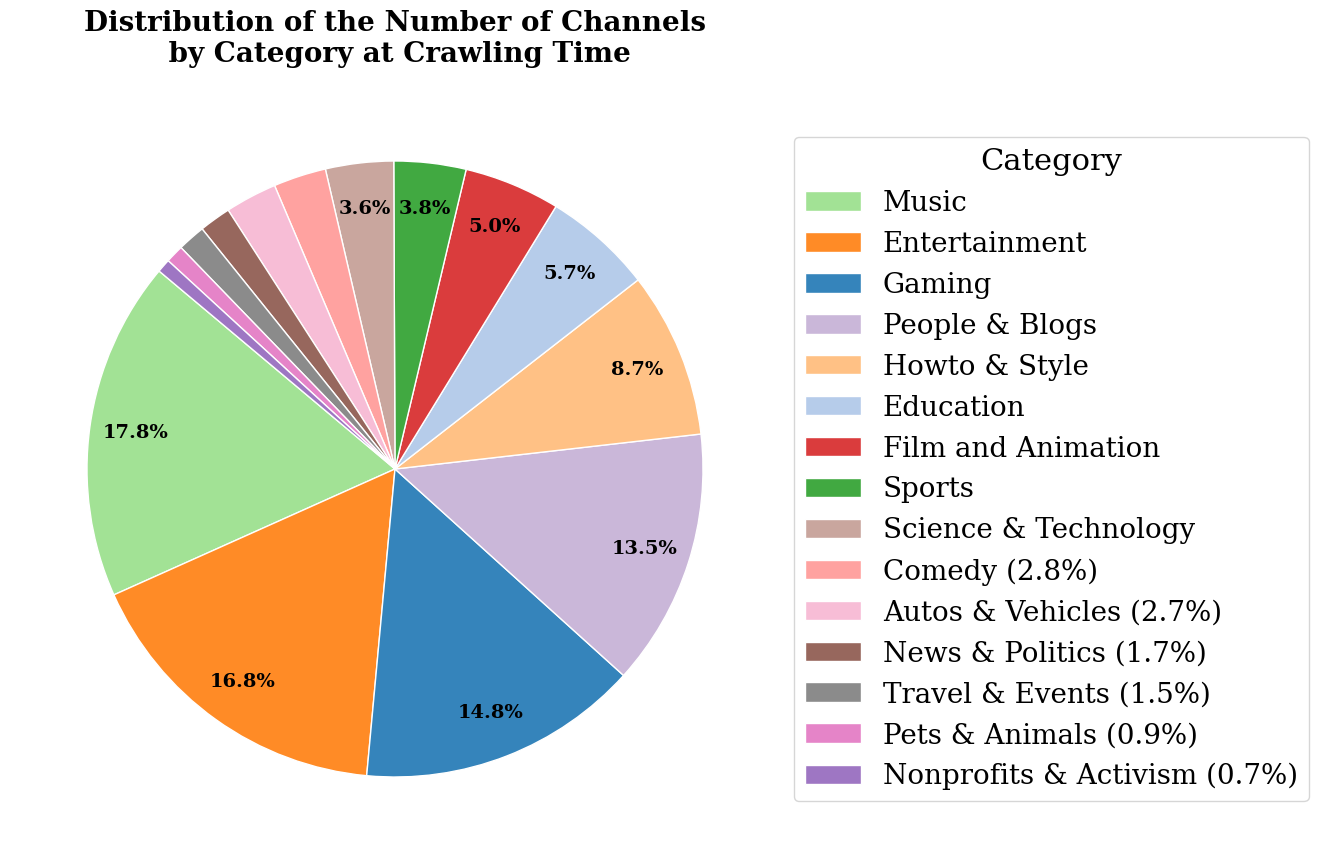

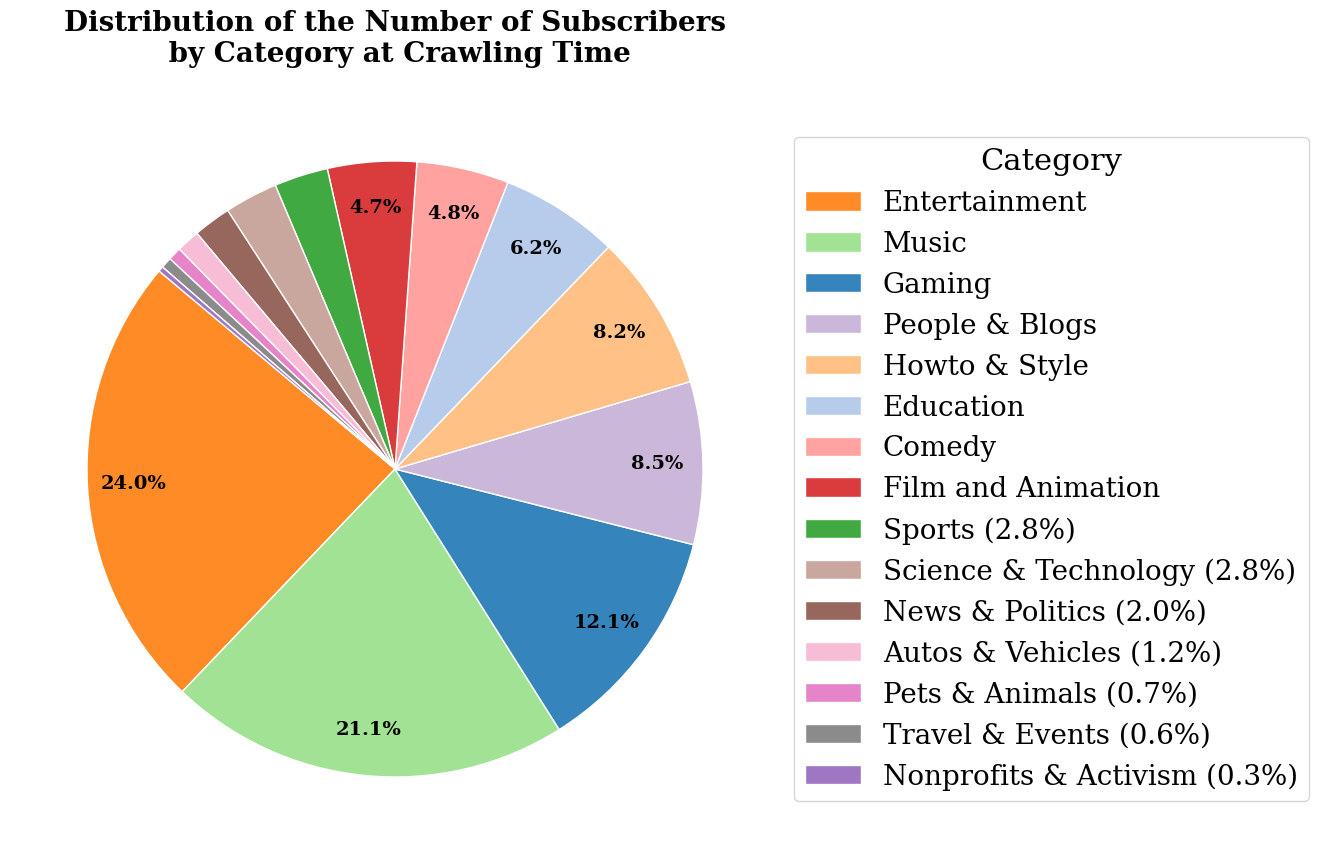

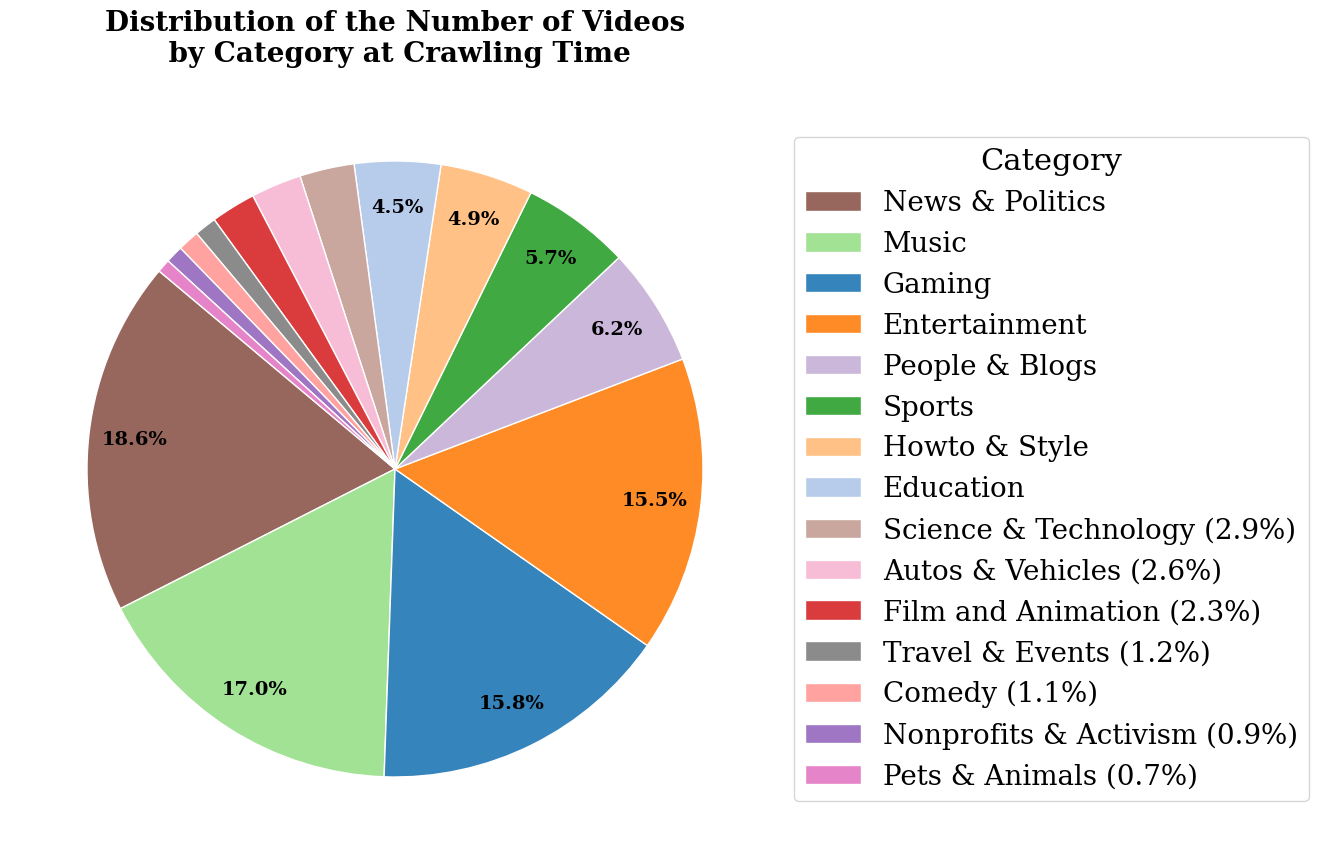

In [6]:
# Get the general statistics of the channel dataset
values = [None, "subscribers_cc", "videos_cc"]
titles = ["Channels", "Subscribers", "Videos"]

for value, title in zip(values, titles):
    data_utils.plot_pie_chart(df=df_channels, 
                              column="category_cc", 
                              values=value, 
                              title=f"Distribution of the Number of {title}\n by Category at Crawling Time")

These Pie Charts justify the choice of Music and Entertainment for our comparison as they are the biggest on YouTube. At crawling time, together they cumulate $\sim$ 35% of the total number of channels and $\sim$ 45% of the total number of subscribers. \
However, they do not necessarily have the highest number of videos. The 4 greatest categories are (in decreasing order): News & Politics > Music > Gaming > Entertainment. This can be explained by the fact that News and Gaming channels output videos frequently, even though they might not amass as many views and/or subscribers.

In [7]:
# For each category, save the channels in a separate file 
data_utils.save_data_grouped_by_category(df_channels, 
                                         column="category_cc", 
                                         output_dir=CHANNELS_PATH, 
                                         overwrite=True, 
                                         verbose=False)

## 2.2) Example of Channel Data: The Music Category

For each category, we can analyze the distribution of the various features. We can also compute the correlation between these quantities. Here, we focus on the `Music` category.

Displaying statistics to study the YouTube channels in the category: Music

The category Music consists of 24285 channels.
The DataFrame occupies 5.51 MB.


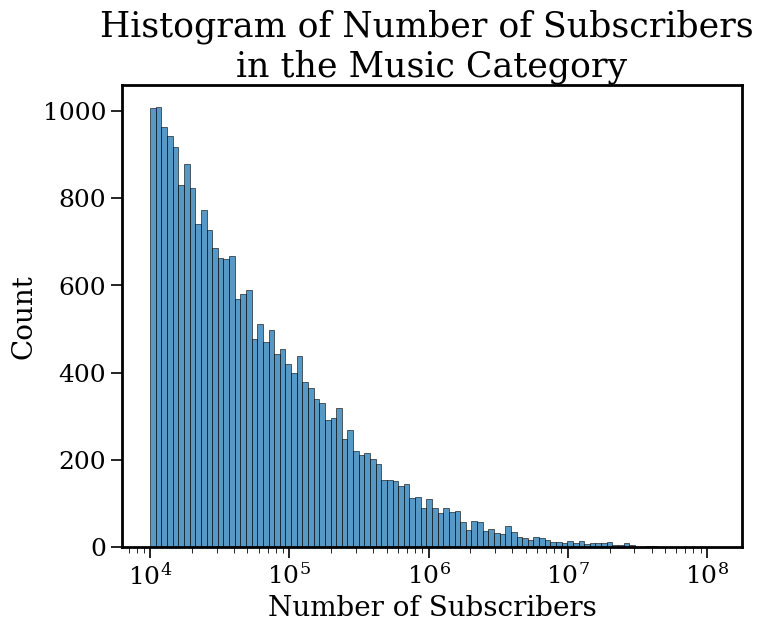

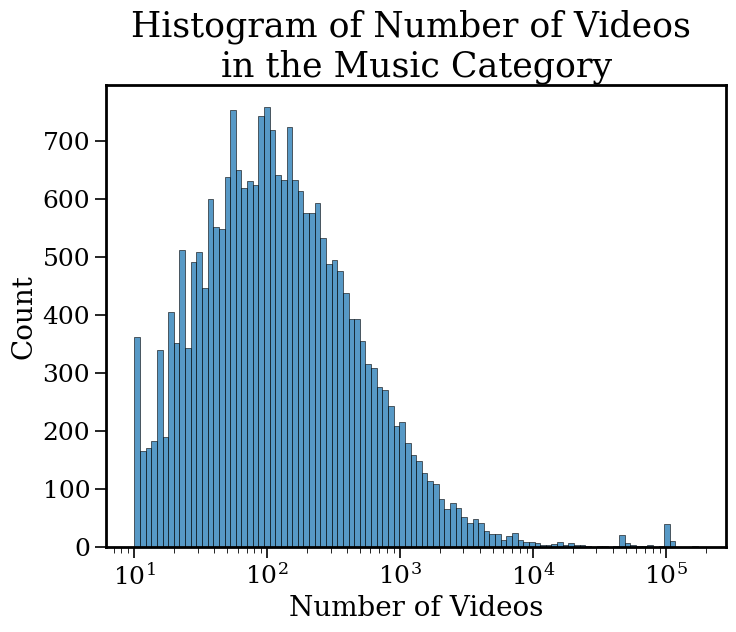

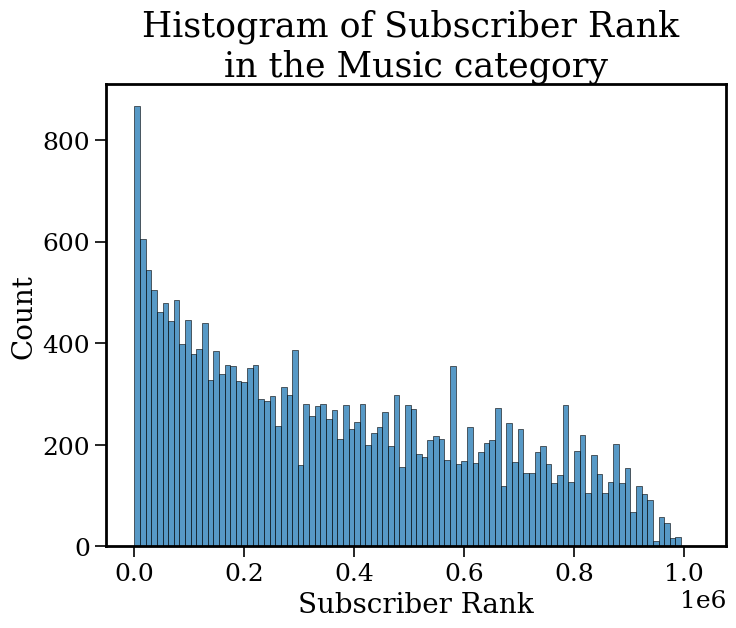

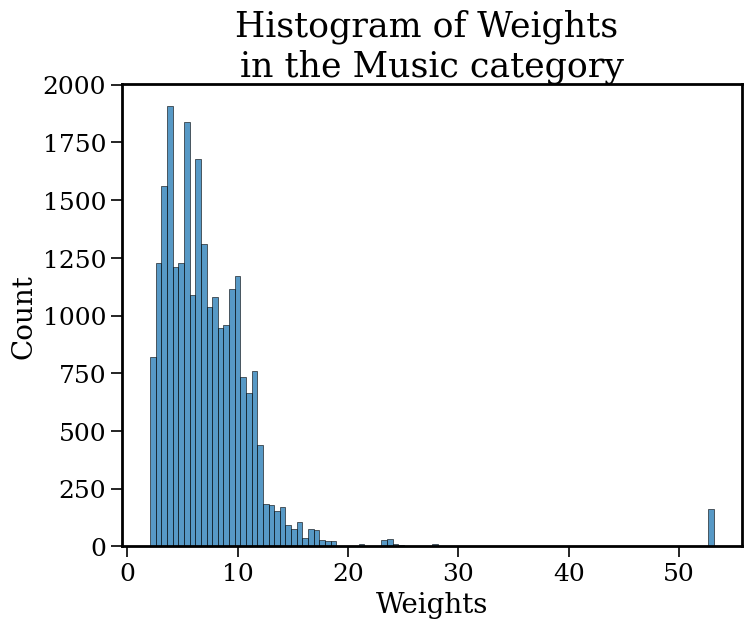

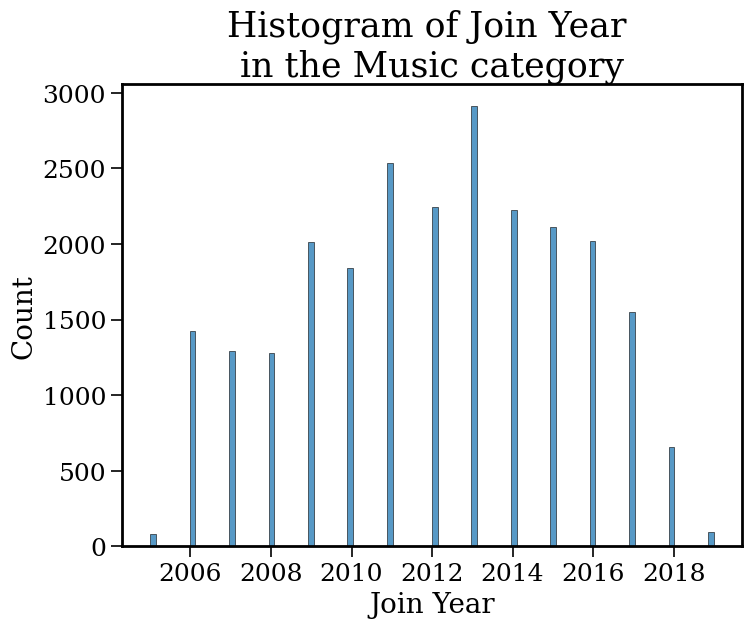

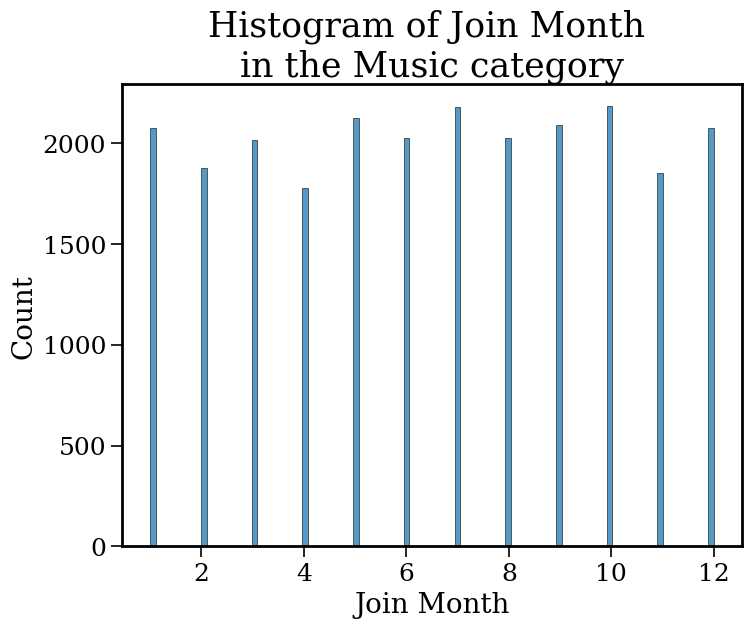

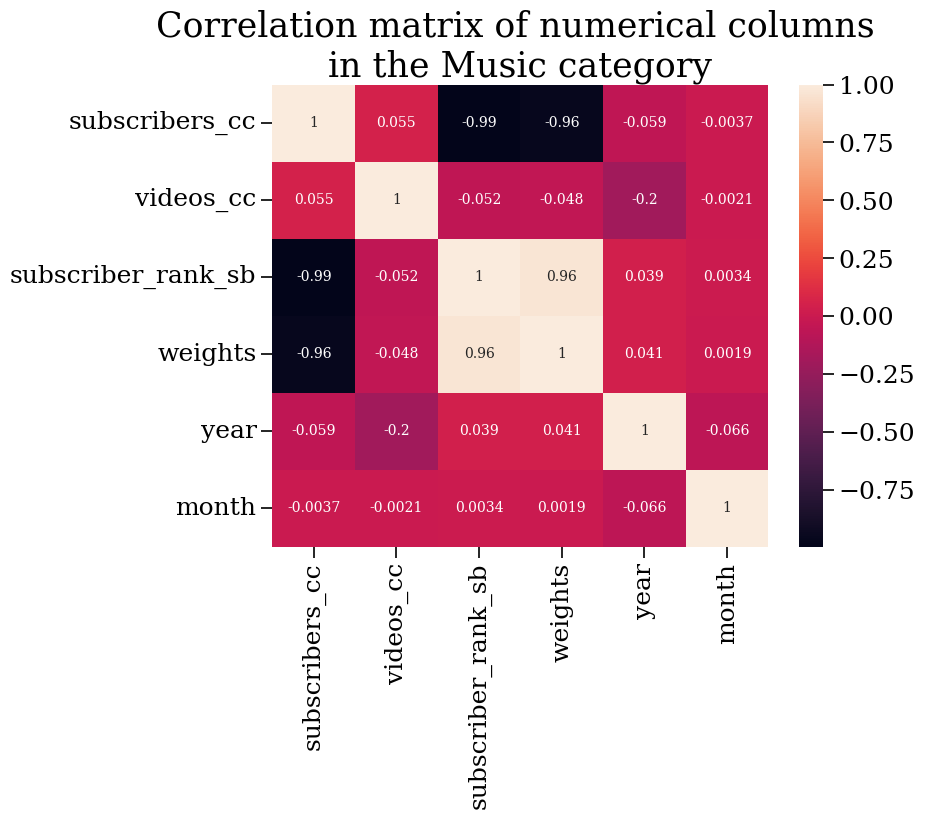

,Type,count,mean,std,min,25%,50%,75%,max,Missing values,Percentage missing
join_date,datetime64[ns],24285,2012-07-19 12:41:53.551575040,NaN,2005-06-25 00:00:00,2009-12-23 00:00:00,2012-09-29 00:00:00,2015-03-04 00:00:00,2019-08-15 00:00:00,0,0.000000
subscribers_cc,int32,24285.0,292134.635948,1600659.370285,10000.0,18200.0,39600.0,127167.0,112139463.0,0,0.000000
videos_cc,int32,24285.0,666.219518,5506.17201,10.0,47.0,113.0,300.0,175300.0,0,0.000000
subscriber_rank_sb,float32,24285.0,366227.21875,271077.125,13.0,124802.0,318630.0,582120.0,1025119.0,0,0.000000
weights,float32,24285.0,7.420398,5.131663,2.087,4.3735,6.5675,9.436,53.143501,0,0.000000
category_cc,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
channel,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.000000
name_cc,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.008236


In [8]:
category = "Music"
df_channel_music = pd.read_csv(f"{CHANNELS_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_channel_music = data_utils.cast_df(df_channel_music, type='channel')

data_utils.get_stats_on_category(df_channel_music,
                                 type='channel', 
                                 category_name=category, 
                                 corr_method='spearman', 
                                 verbose=False)

# 3. Time Series Dataset Analysis

In [9]:
df_time_series = pd.read_csv(f"{DATA_PATH}/time_series.tsv.gz", sep="\t", compression="gzip")
df_time_series.head(3)

,channel,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
0,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-03 00:00:00,202494.555556,0.000000,650.222222,0.000000,5,0,3
1,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-10 00:00:00,394085.666667,191591.111111,1046.000000,395.777778,6,1,1
2,UCBJuEqXfXTdcPSbGO9qqn1g,Film and Animation,2017-07-17 00:00:00,835393.750000,441308.083333,1501.500000,455.500000,6,0,1


In [10]:
# For each category, save the time series in a separate file if overwrite is set to True
data_utils.save_data_grouped_by_category(df_time_series, 
                                         column="category", 
                                         output_dir=TIME_SERIES_PATH,
                                         overwrite=False, 
                                         verbose=False)

## 3.1) Example of Time Series Data: The evolution of some famous channels

Let's focus on the `Music` category and particular channels. First, since we only have access to the channel ids (via the `channel` column), we need to merge the channel ids with the channel names available in the `df_channels` dataset under the `name_cc` column.

In [11]:
category = "Music"

# Load the Music time series
df_music_time_series = pd.read_csv(f"{TIME_SERIES_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_music_time_series = data_utils.cast_df(df_music_time_series, type='time_series')

# Load the Music channels
df_music_channels = pd.read_csv(f"{CHANNELS_PATH}/{category}.tsv.gz", sep='\t', compression='gzip')
df_music_channels = data_utils.cast_df(df_music_channels, type='channel')

# Add the channel names to the time series dataset by merging the two datasets
df_music_time_series = data_utils.merge_channel_name(df_music_time_series, df_music_channels, subscriber_rank=True)

In [12]:
df_music_time_series[["channel", "name_cc", "delta_views"]].sample(3)

,channel,name_cc,delta_views
51205,UCNyhY2w6eZe5-VOYK8uvIDw,Mol Mic,34908.815126
3520729,UCUIijn8EdtcTjNt4tbT13qw,ok boi,5546.068182
108986,UCq4bZeYa-eJZjVv791zWpOw,David Larson,8297.870370


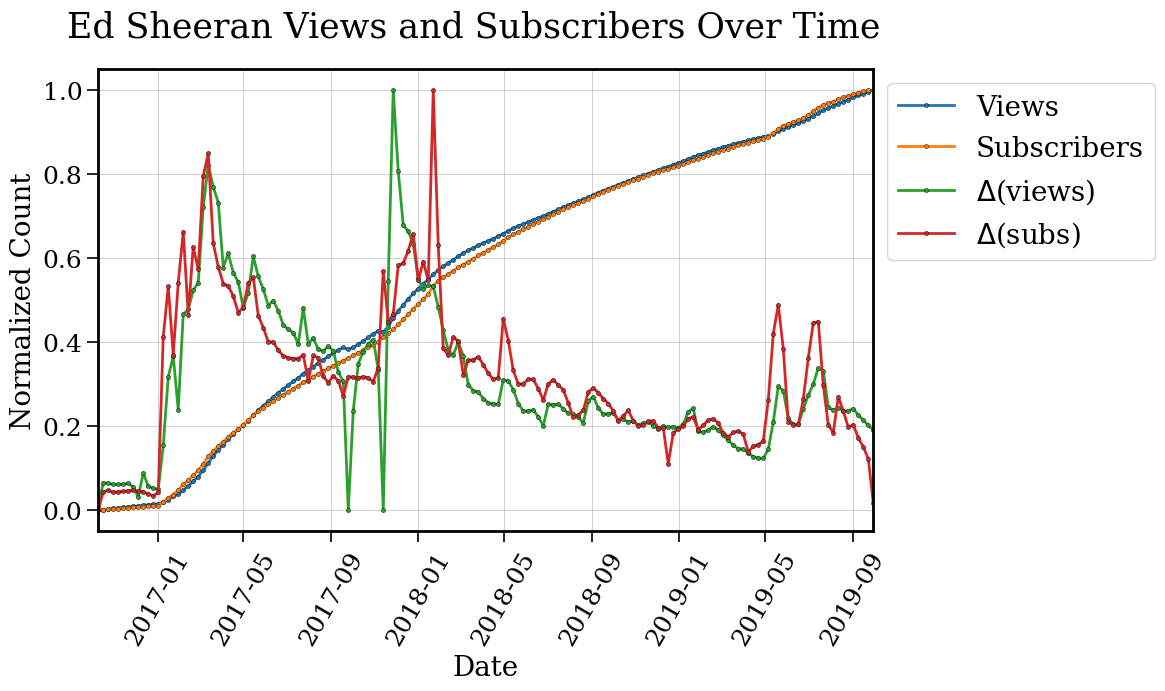

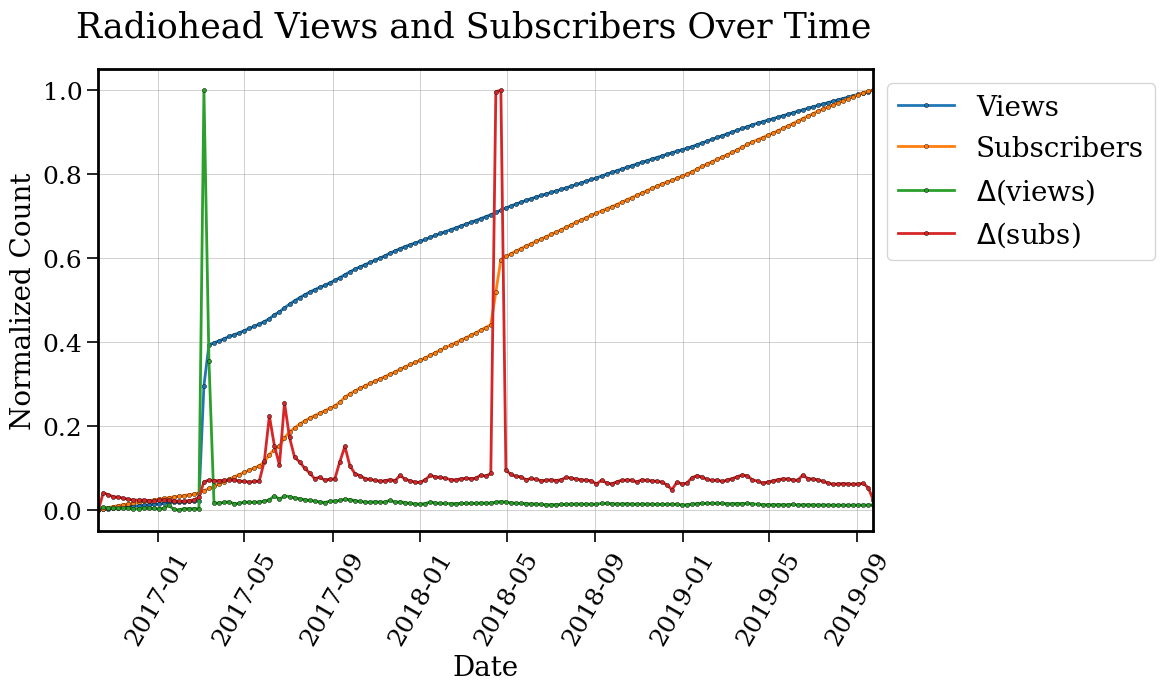

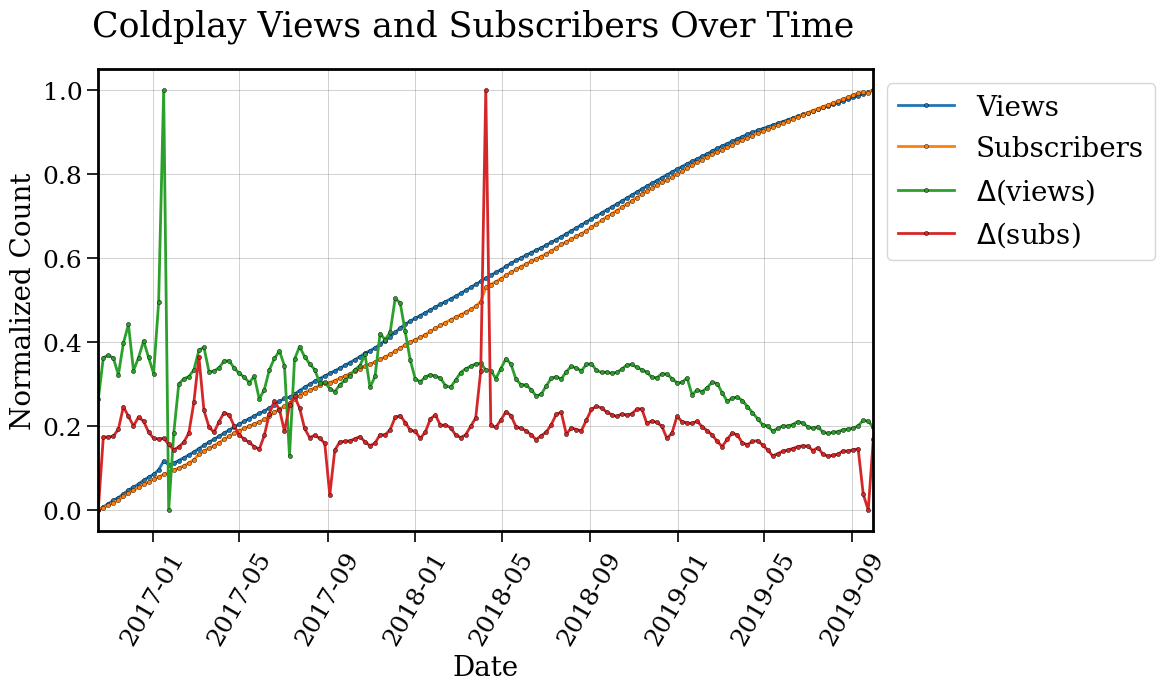

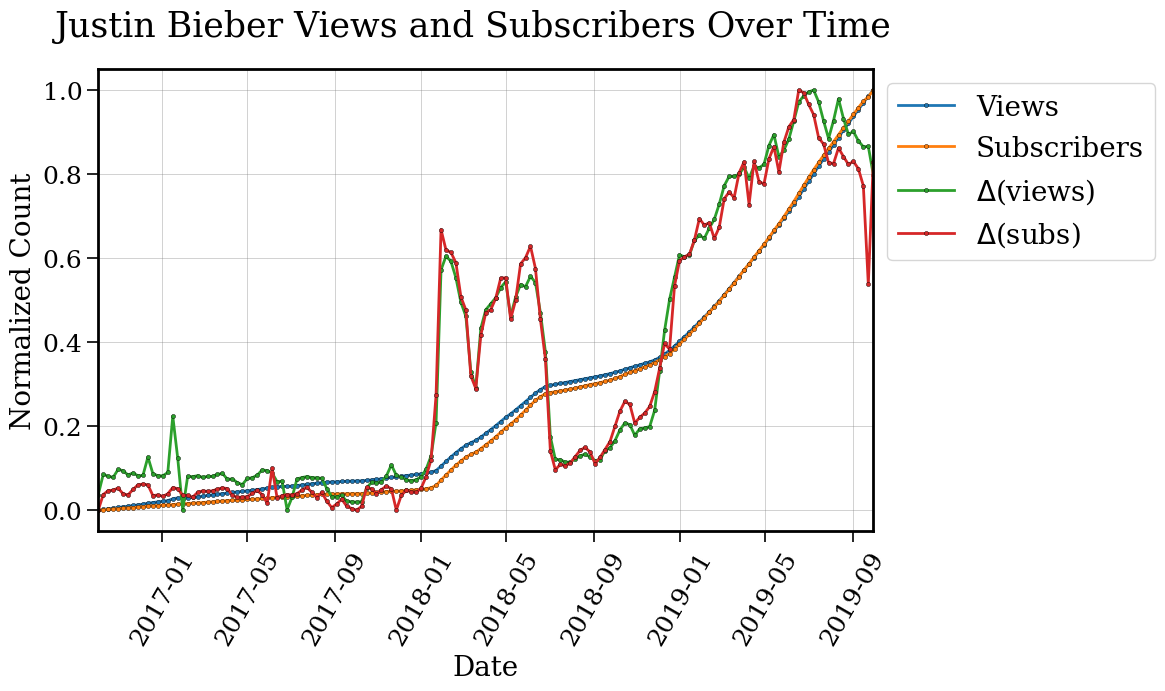

In [13]:
# Here we use normalized data to compare the evolution trend of different channels (not the specific values)
channel_names = ["Ed Sheeran", "Radiohead", "Coldplay", "Justin Bieber"]
for channel_name in channel_names:
    data_utils.plot_channel_time_series(df=df_music_time_series,
                                        channel_name=channel_name,
                                        datetime_col="datetime",
                                        quantities_to_plot=["views", "subs", "delta_views", "delta_subs"],
                                        normalize=True,
                                        palette="tab10",
                                        markers=["."],
                                        title=f"{channel_name} Views and Subscribers Over Time")

In the time-series given above, it is interesting to note the tall peaks in $\Delta(views)$ and $\Delta(subs)$, in particular for Ed Sheeran, Radiohead and Coldplay. A more in depth analysis of this feature will have to be performed to see if it is random, if it is due to external events (external to the dataset), or if there is some hidden mechanism linking these peaks between different artists.

## 3.2) Various distributions of the time series data

As for the channel dataset, we can analyze the distribution of the various features in the time series dataset. Here, we again focus on the `Music` category. 

We start by plotting the distribution of the `delta_views`, `delta_subs`, and `delta_videos`, these represent the weekly gains (or losses) in views, subscribers, and videos, respectively.

**Observations for the Music Category:**
- Both the distributions of $\Delta$(views) and $\Delta$(subs) seem close to log-normal distributions (the latter is a bit skewed to the left), with a sharp peak at zero (meaning that many channels do not gain or lose many views or subscribers weekly). This peak could has different contributions: for instance, "dead" channels that do not post new content, or channels that upload monthly or yearly. 
- The distribution of $\Delta$(videos) is power-law distributed as can be seen from the log-log plot.

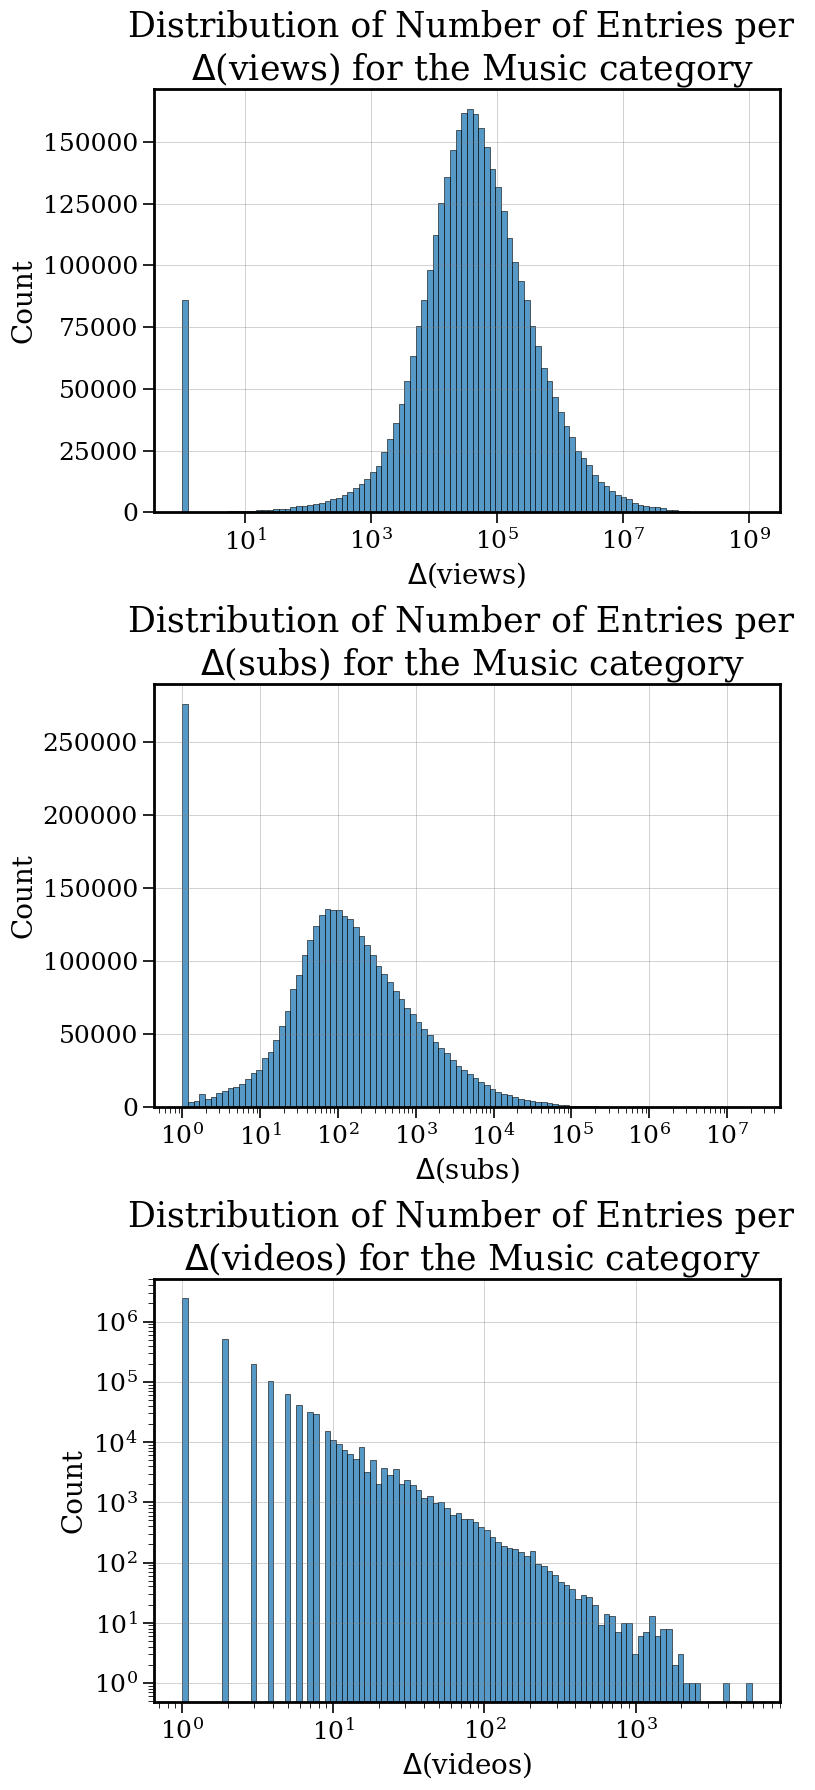

Summary statistics for the ['delta_views', 'delta_subs', 'delta_videos']:
        delta_views    delta_subs  delta_videos
count  3.532411e+06  3.532411e+06  3.532411e+06
mean   5.024196e+05  1.455334e+03  2.250262e+00
std    4.831397e+06  3.365696e+04  1.012890e+01
min    1.000000e+00  1.000000e+00  1.000000e+00
25%    1.270512e+04  3.630556e+01  1.000000e+00
50%    4.314838e+04  1.168889e+02  1.000000e+00
75%    1.612702e+05  4.424583e+02  2.000000e+00
max    1.104146e+09  2.053974e+07  5.860000e+03


In [26]:
data_utils.plot_category_distribution(df_data=df_music_time_series,
                                      columns=["delta_views", "delta_subs", "delta_videos"],
                                      category="Music",
                                      x_logs=[True, True, True],
                                      y_logs=[False, False, True],
                                      kind="hist",
                                      print_summary=True)

## 3.3) Comparison of the distributions across different categories

Something that is more interesting is to compare these distributions across different categories. Let's plot the `delta_views`, `delta_subs`, and `delta_videos` distributions for different categories. 

For example, we expect that the "News & Politics" category has a higher $\Delta$(videos) distribution compared to other categories, as news channels tend to upload multiple videos daily.

The cell bellow plots the histograms for the `delta_views`, `delta_subs`, and `delta_videos` distributions for the categories `News & Politics`, `Travel & Events`, `Music`, and `Education`. We only plot the markers to avoid the overlap of the bars.

We indeed observe that the `News & Politics` category has a heavier tail for the `delta_videos` distribution compared to the other categories. 

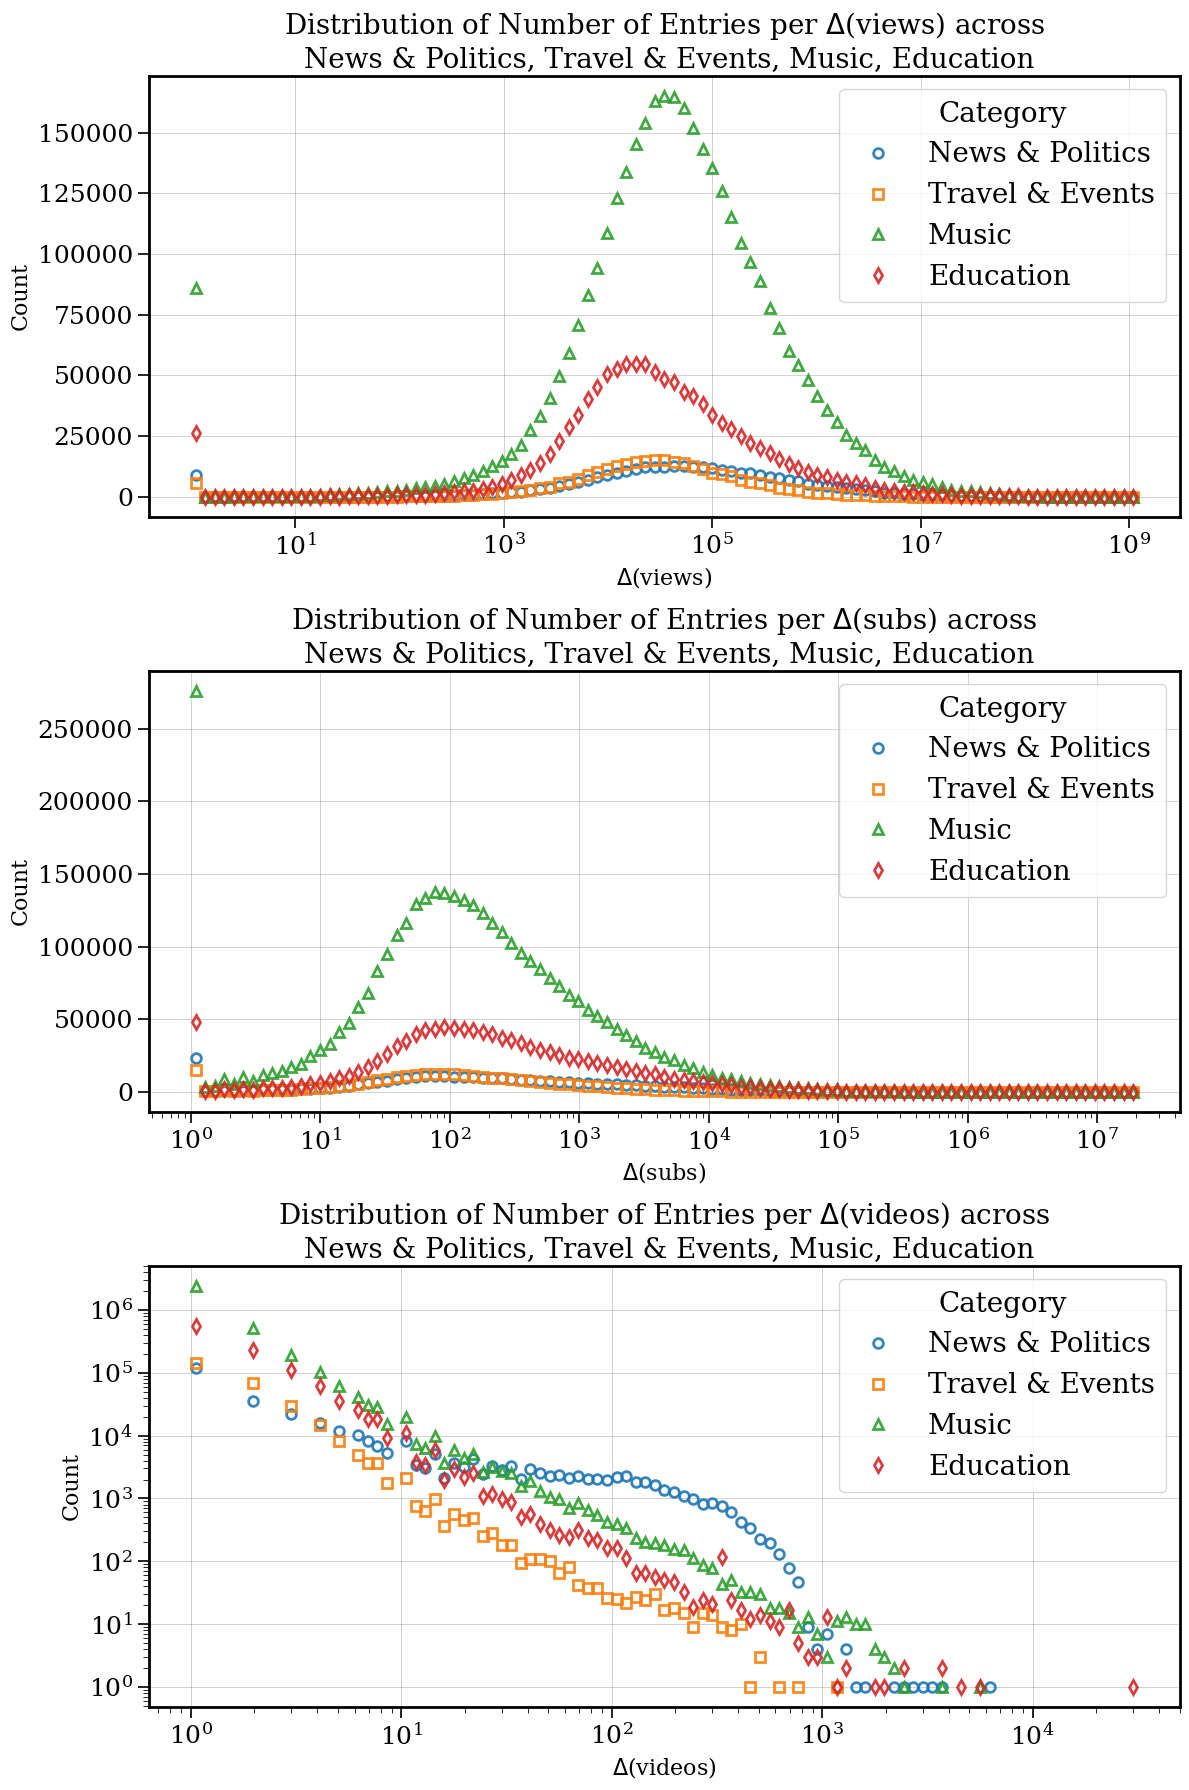

In [25]:
categories = ["News & Politics", "Travel & Events", "Music", "Education"]
data_utils.compare_distribution_across_categories(df_time_series,
                                                  columns=["delta_views", "delta_subs", "delta_videos"],
                                                  hue="category",
                                                  categories=categories,
                                                  x_logs=[True, True, True],
                                                  y_logs=[False, False, True],
                                                  kind="hist", 
                                                  marker_only=True)

On the graphs above, we observe that the number of entries around the median for $\Delta(views)$ and $\Delta(subs)$ is dominated by the Music category, as expected. However when considering $\Delta(videos)$, the number of entries with $\Delta(videos)>10^2$ stays higher for News & Politics, whereas it decreases for the other categories. Once again, this is not surprising as News & Politics channels tend to upload more frequently.

# 4. Video Metadata Dataset Analysis

<div style="padding: 15px 20px; border-left: 3px solid red; background-color: #FFC7C7; border-radius: 20px; color: #424242;">
    
**Warning:** The cell below should be run only once (it takes a long time to write the files ~1h30min)
</div>

In [16]:
# Process the metadata file by saving each category in a separate file
# data_utils.process_metadata(f"{DATA_PATH}/yt_metadata.jsonl.gz",
#                             output_dir=VIDEO_METADATA_PATH,
#                             column_to_group="categories",
#                             chunk_size=10_000)

## 4.1) Example of Video Metadata Statistics for the Music Category

In [3]:
# creating a dataframe for each category we are interested in (Music and Entertainment here)

dataframes = {}

categories = ['Entertainment', 'Music'] 

for category in categories:

    df = pd.read_parquet(f"{VIDEO_METADATA_PATH}/{category}.parquet.gz")
    df = data_utils.cast_df(df, type='video_metadata')
    df.dropna(inplace=True)
    
    dataframes[f'df_metadata_{category}'] = df

df_music = dataframes['df_metadata_Music'].copy(deep=True)
df_entertainment = dataframes['df_metadata_Entertainment'].copy(deep=True)

Displaying statistics to study the YouTube videos in the category: music

The category music consists of 8197981 videos.
The DataFrame occupies 14436.76 MB.



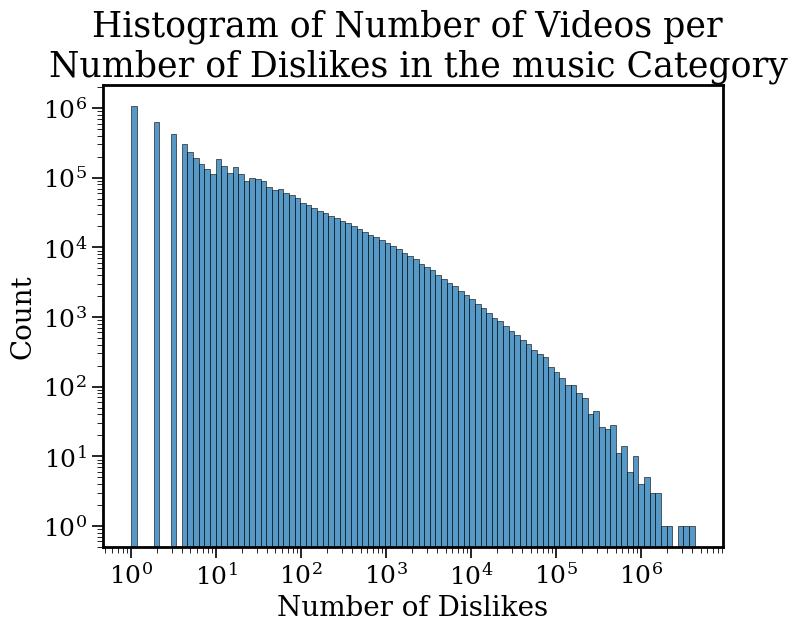

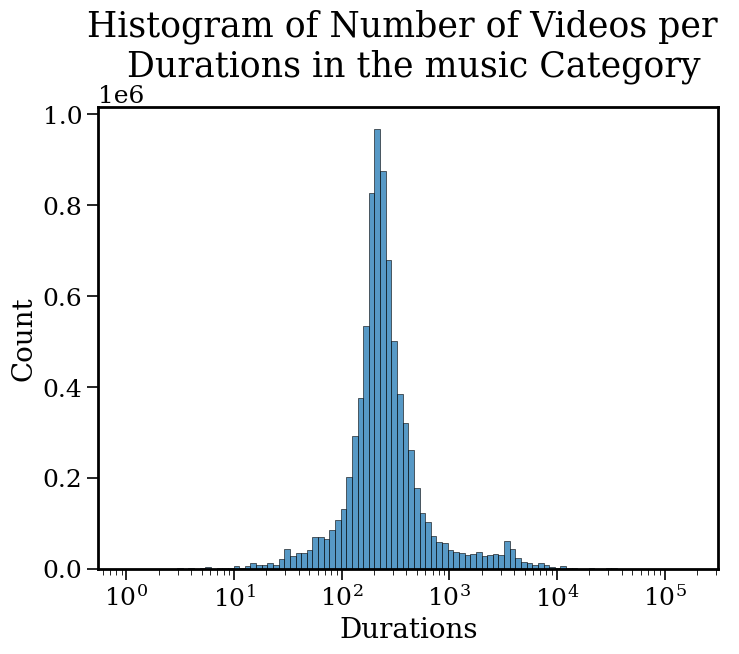

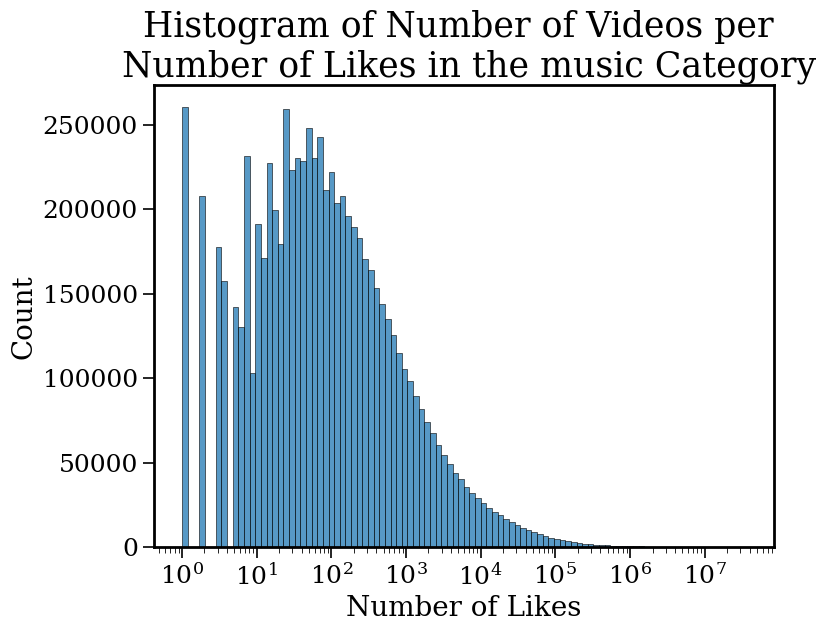

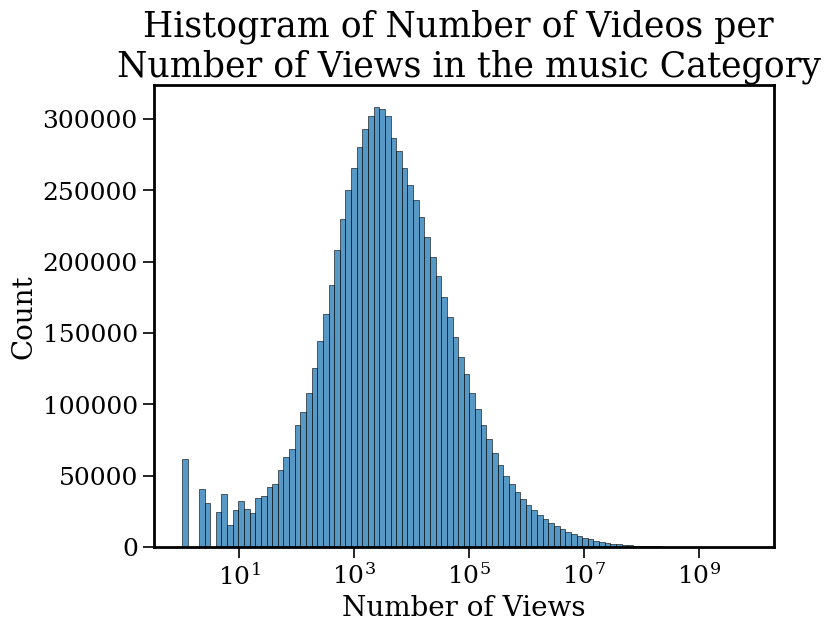

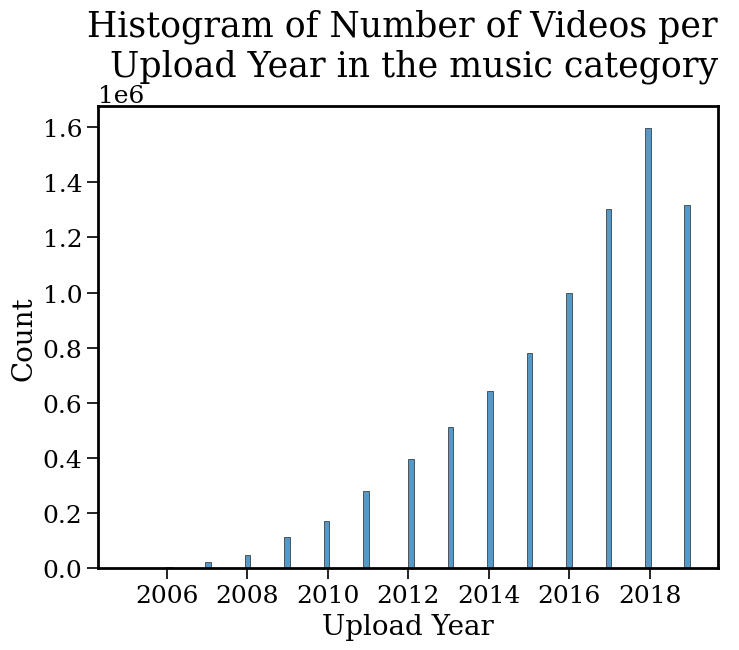

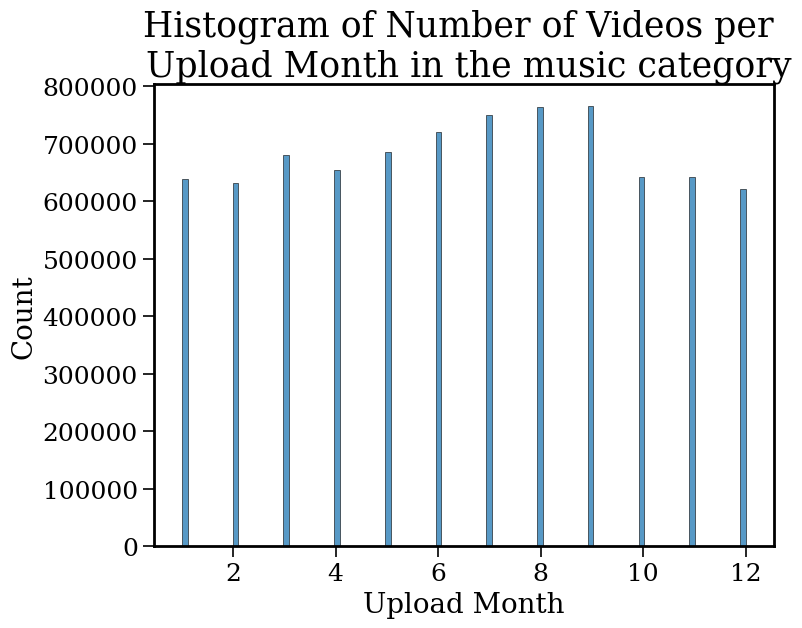

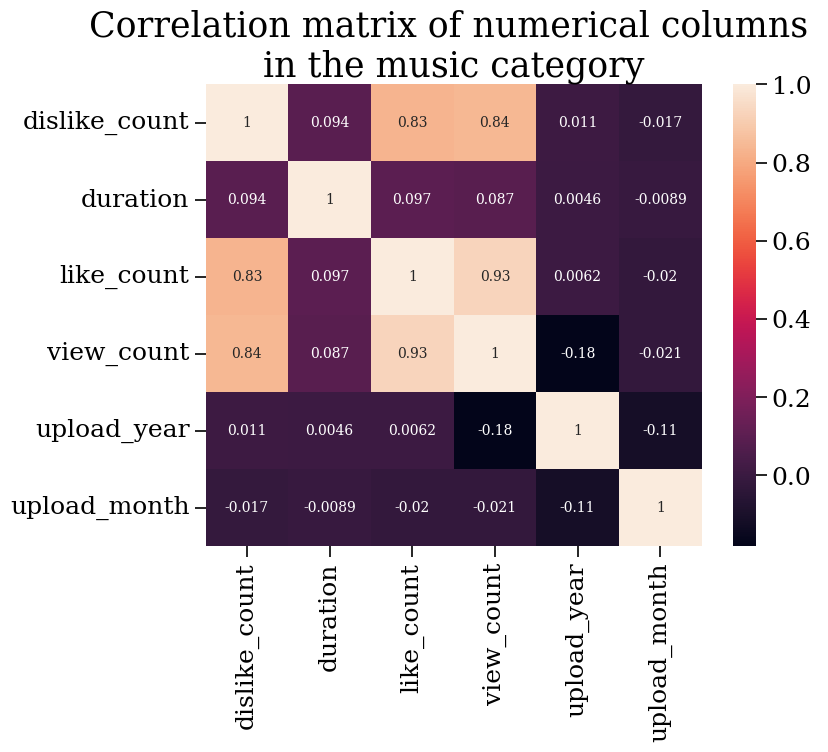

,Type,count,mean,std,min,25%,50%,75%,max,Missing values,Percentage missing
crawl_date,datetime64[ns],8197981,2019-11-10 07:11:01.661946624,NaN,2019-10-29 16:47:24.970666,2019-11-03 03:01:06.791421952,2019-11-10 09:16:50.808062976,2019-11-17 10:29:45.057683968,2019-11-23 15:34:17.741614,0,0.0
dislike_count,float32,8197981.0,108.778549,4079.209717,0.0,0.0,2.0,9.0,4265883.0,0,0.0
duration,int32,8197981.0,470.293198,1355.939314,1.0,172.0,230.0,333.0,172919.0,0,0.0
like_count,float64,8197981.0,2350.635442,50933.245053,0.0,9.0,50.0,268.0,35287325.0,0,0.0
upload_date,datetime64[ns],8197981,2016-06-02 12:59:32.481760256,NaN,2005-11-19 00:00:00,2014-10-15 00:00:00,2017-02-04 00:00:00,2018-07-25 00:00:00,2019-11-20 00:00:00,0,0.0
view_count,float64,8197981.0,300966.44338,9202386.102651,0.0,655.0,3339.0,19552.0,6509934494.0,0,0.0
categories,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
channel_id,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
description,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0
display_id,string[python],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0


In [4]:
# Example of Video Metadata Statistics for the Music Category

data_utils.get_stats_on_category(df_music,
                                 type='video_metadata', 
                                 category_name='music', 
                                 corr_method='spearman', 
                                 verbose=False)

## 4.2) Comparison of duration distribution for the Music and Entertainment categories

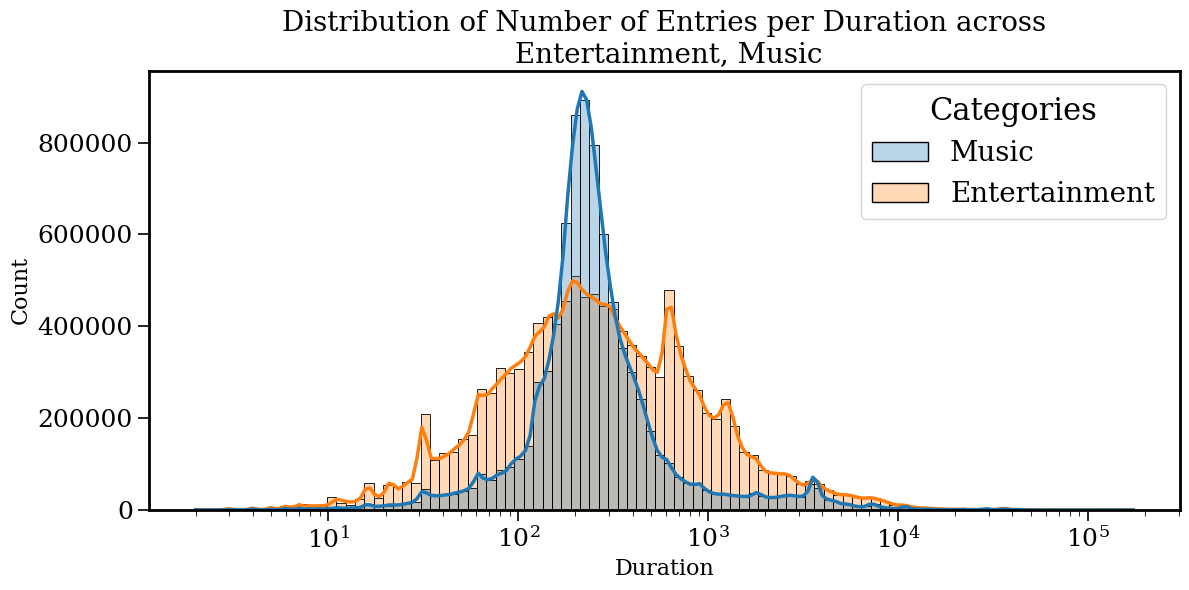

In [5]:
# Comparison of durations distribution between the two categories

df_metadata_compare =  pd.concat([df_music, df_entertainment], axis=0)
data_utils.compare_distribution_across_categories(df_metadata_compare,
                                                  columns=["duration"],
                                                  categories=categories,
                                                  x_logs=[True],
                                                  y_logs=[False],
                                                  kind="hist",
                                                  hue="categories")

## 4.3) Comparison of estimated monetization and viewer engagement distribution for the Music and Entertainment categories

In [7]:
# keeping only "famous" videos, i.e. videos with more views than a threshold

threshold = df_music['view_count'].quantile(0.85) # arbitrarly chosen 

df_famous_music = df_music[df_music['view_count'] > threshold].copy()
df_famous_entertainment = df_entertainment[df_entertainment['view_count'] > threshold].copy()

In [8]:
# Engagement analysis
    # Creation of engagement score for the 2 datasets
df_famous_entertainment['engagement_score'] = (
    ((df_famous_entertainment['like_count'] + df_famous_entertainment['dislike_count']) / df_famous_entertainment['view_count'])
)

df_famous_music['engagement_score'] = (
    ((df_famous_music['like_count'] + df_famous_music['dislike_count']) / df_famous_music['view_count'])
)

# Monetization analysis
    # defining an hypothetic CPM for each category
cpm_music = 1.5 # this one is smaller (see the reference)
cpm_entertainment = 2.0

    # Calculating the estimated revenue for each category
df_famous_music['duration_factor'] = 1 + 0.5 * (df_famous_music['duration'] // 480)  # Facteur pour les durées supérieures à 8 min
df_famous_music['estimated_revenue'] = (
    (df_famous_music['view_count'] / 1000) * cpm_music * df_famous_music['duration_factor']
)

df_famous_entertainment['duration_factor'] = 1 + 0.5 * (df_famous_entertainment['duration'] // 480)  # Facteur pour les durées supérieures à 8 min
df_famous_entertainment['estimated_revenue'] = (
    (df_famous_entertainment['view_count'] / 1000) * cpm_entertainment * df_famous_entertainment['duration_factor']
)

# now every video has a "estimated revenue" and "engagement score" value

df_famous_metadata_compare =  pd.concat([df_famous_music, df_famous_entertainment], axis=0)


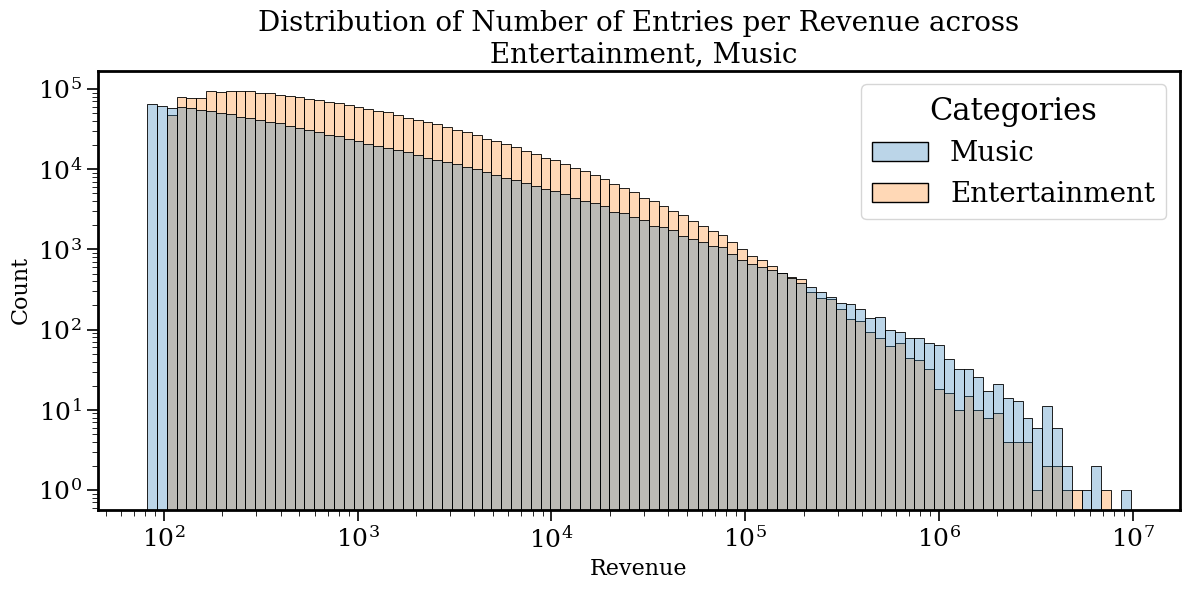

In [9]:
# Comparison of estimated revenue distribution between the two categories

data_utils.compare_distribution_across_categories(df_famous_metadata_compare,
                                                  columns=["estimated_revenue"],
                                                  categories=categories,
                                                  x_logs=[True],
                                                  y_logs=[True],
                                                  kind="hist",
                                                  hue="categories")

                                            

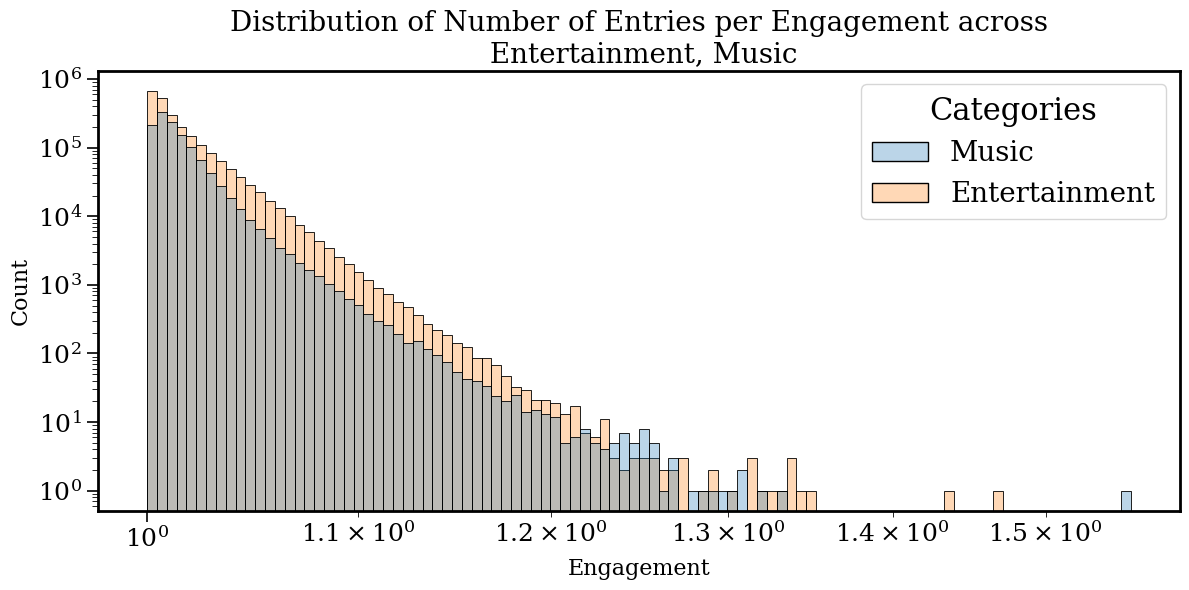

In [10]:
# Comparison of engagement score distribution between the two categories

data_utils.compare_distribution_across_categories(df_famous_metadata_compare,
                                                  columns=["engagement_score"],
                                                  categories=categories,
                                                  x_logs=[True],
                                                  y_logs=[True],
                                                  kind="hist",
                                                  hue="categories")

# 5. Comment Dataset Analysis

In [6]:
df_num_comments = pd.read_csv(f"{DATA_PATH}/num_comments.tsv.gz", sep="\t", compression="gzip")
df_num_comments.sample(3)

,display_id,num_comms
10306299,yJDI7RrKN8s,12.0
4910994,mojol8MHM38,748.0
8987097,NqcZxfuR368,71.0


Text(0, 0.5, 'Count')

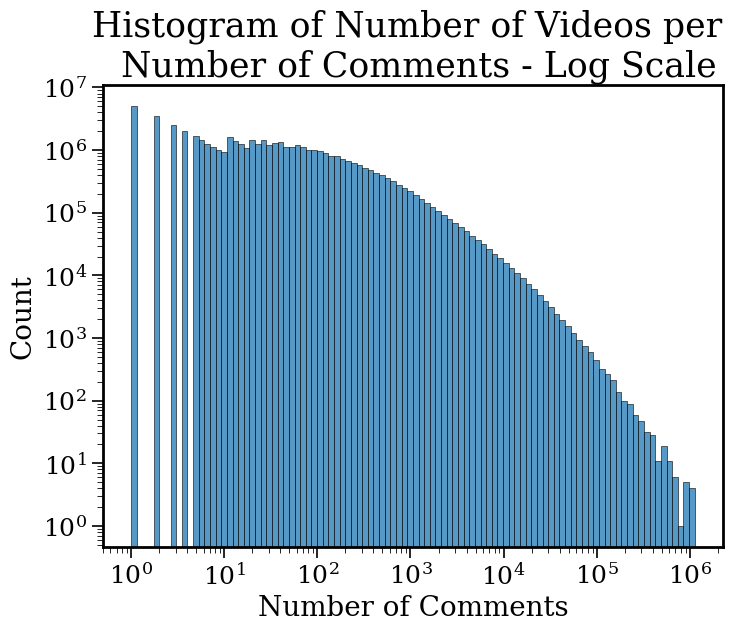

In [20]:
sns.histplot(df_num_comments['num_comms'], bins=100, log_scale=True)
plt.yscale('log')
plt.title(f"Histogram of Number of Videos per \n Number of Comments - Log Scale", fontsize=25)
plt.xlabel(f"Number of Comments", fontsize=20)
plt.ylabel("Count", fontsize=20)

In [10]:
df_num_comments_authors = pd.read_csv(f"{DATA_PATH}/num_comments_authors.tsv.gz", sep="\t", compression="gzip")
df_num_comments_authors.sample(3)

,author,video_id
194952182,250449481,1
360821130,463515274,1
343320962,441032528,6


Text(0, 0.5, 'Count')

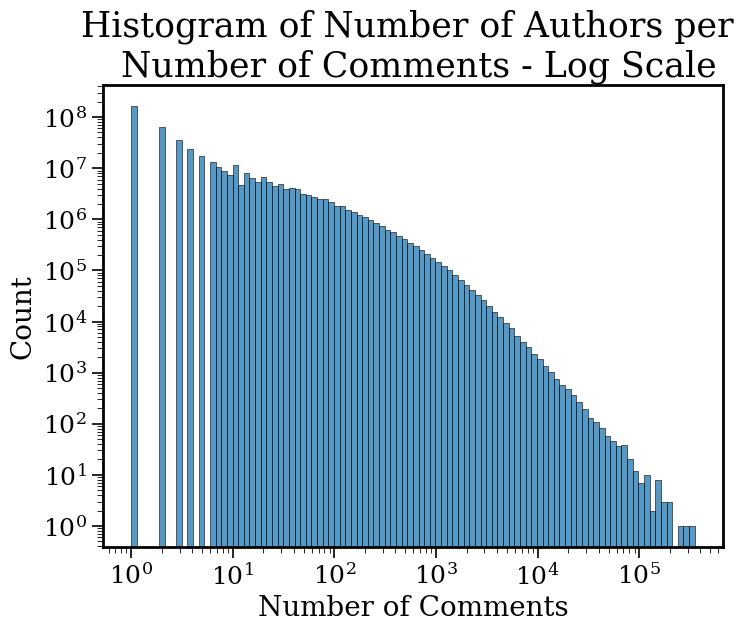

In [18]:
sns.histplot(df_num_comments_authors['video_id'], bins=100, log_scale=True)
plt.yscale('log')
plt.title(f"Histogram of Number of Authors per \n Number of Comments - Log Scale", fontsize=25)
plt.xlabel(f"Number of Comments", fontsize=20)
plt.ylabel("Count", fontsize=20)

In [ ]:
# The comments dataset is very large and therefore we have not loaded it here into pandas. If we need to use this dataset in its entirety
# (and not just the num_comments and num_comments_authors datasets), we will have to load it and filter the data with PySpark.
# df_youtube_comments = pd.read_csv(f"{DATA_PATH}/youtube_comments.tsv.gz", sep="\t", compression="gzip")
# df_youtube_comments.sample(3)

# 6. Loading Big Datasets with PySpark

In [21]:
from pyspark.sql import SparkSession

# Driver Memory
DRIVER_MEMORY = '12g'

# Initialize a SparkSession
spark = SparkSession.builder \
    .appName("Local PySpark Session") \
    .config("spark.driver.memory", DRIVER_MEMORY) \
    .master("local[*]") \
    .getOrCreate()

# Check if the SparkSession is running
print("Spark version:", spark.version)

Spark version: 3.5.3


In [17]:
# Read comments dataset into PySpark Dataframe and show the first 20 rows
df_spark_comments = spark.read.option('delimiter', '\t').csv(f'{DATA_PATH}/youtube_comments.tsv.gz')
df_spark_comments.show()

+------+-----------+-----+-------+
|   _c0|        _c1|  _c2|    _c3|
+------+-----------+-----+-------+
|author|   video_id|likes|replies|
|     1|Gkb1QMHrGvA|    2|      0|
|     1|CNtp0xqoods|    0|      0|
|     1|249EEzQmVmQ|    1|      0|
|     1|_U443T2K_Bs|    0|      0|
|     1|rJbjhm0weYc|    0|      0|
|     2|EpHERODJ7gM|    0|      0|
|     2|9pQILRT42Cg|    0|      0|
|     2|PWWRzCyuiFU|    0|      0|
|     3|o7W2fdWXnPc|    0|      0|
|     3|Y9XhBAazNqk|    0|      0|
|     4|9dYn-z8RoZg|    0|      0|
|     4|7fY0grcsIIE|    1|      0|
|     4|aM88wp03DNo|    0|      0|
|     4|7pN6ZgGRfQU|    0|      0|
|     4|u_alXoZ4774|    0|      0|
|     4|tYpX-AeDfAA|    0|      0|
|     5|Z7gFd-KUeB0|    0|      0|
|     5|9MuGpmXGlsY|    0|      0|
|     5|UvZPbfUkMGw|    0|      0|
+------+-----------+-----+-------+
only showing top 20 rows

